In [1]:
import pandas as pd
import datetime
from tqdm import tqdm


In [2]:
data = pd.read_csv('qua_cua_phu.csv', header=0, parse_dates=True)
df_list = [d.sort_values('DATE') for _, d in data.groupby(['SYMBOL'])]

fil = []
for i in range(len(df_list)):
    fil.append(df_list[i].SYMBOL.iloc[1])

close = pd.DataFrame()
close = data.pivot(index='DATE',columns='SYMBOL',values='CLOSE')

In [3]:

df_list[1].columns

Index(['DATE', 'SYMBOL', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi',
       'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_atr', 'volatility_ui',
       'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
  

In [4]:
def abc(df_list):

    df1 = df_list[1]
    df1.DATE = [str(b)[:10] for b in df1.DATE]

    position = pd.DataFrame()
    position['DATE'] = df1.DATE
    for a in tqdm(range(len(df_list))):
        df_list[a].DATE = [str(b)[:10] for b in df_list[a].DATE]
        buy = 0
        date = []
        prices = []
        df = pd.DataFrame()
        dt = 0
        dt1 = 0
        sell = 0
        for i in range(1, len(df_list[a]) - 3):
            if df_list[a].volume_mfi.iloc[i] > 60 and buy == 0:
                # dt1 = df_list[a].DATE.iloc[i]
                # if (datetime.datetime.strptime(df_list[a].DATE.iloc[i], '%Y-%m-%d') - datetime.datetime.strptime(dt1, '%Y-%m-%d')).days <= 5:
                prices.append(1)
                date.append(df_list[a].DATE.iloc[i])
                buy = df_list[a].CLOSE.iloc[i]
                dt = df_list[a].DATE.iloc[i]
                
            #if buy != 0:
            # if buy != 0 and 3 <= (datetime.datetime.strptime(df_list[a].DATE.iloc[i], '%Y-%m-%d') - datetime.datetime.strptime(dt, '%Y-%m-%d')).days <= 15:
            #     sell = df_list[a].CLOSE.iloc[i]
            #     if (((sell - buy) / buy) <= 0.015):
            #         prices.append(0)
            #         date.append(df_list[a].DATE.iloc[i])
            #         buy = 0
            # if buy != 0 and 3 <= (datetime.datetime.strptime(df_list[a].DATE.iloc[i], '%Y-%m-%d') - datetime.datetime.strptime(dt, '%Y-%m-%d')).days:
            #     sell = df_list[a].CLOSE.iloc[i]
            #     if (((sell - buy) / buy) >= 0.1):
            #         prices.append(0)
            #         date.append(df_list[a].DATE.iloc[i])
            #         buy = 0
            if df_list[a].volume_mfi.iloc[i] < 5 and buy != 0:
            #if buy != 0:
                prices.append(0)
                date.append(df_list[a].DATE.iloc[i])
                buy = 0
            #if (datetime.datetime.strptime(df_list[a].DATE.iloc[i], '%Y-%m-%d') - datetime.datetime.strptime(dt, '%Y-%m-%d')).days == 3:
            # if df_list[a].volume_mfi.iloc[i] < 5 and buy != 0:
            # #if buy != 0:
            #     prices.append(0)
            #     date.append(df_list[a].DATE.iloc[i])
            #     buy = 0
            # else:
            #     prices.append(0)
            #     date.append(df_list[a].DATE.iloc[i])
            #     buy = 0
        df['DATE'] = pd.Series(date)
        df[fil[a]] = pd.Series(prices)
        position = position.merge(df, how = 'left', on = 'DATE')
    return position

In [5]:
abc(df_list)
position = abc(df_list).fillna(method = 'pad').fillna(0)
position.set_index('DATE', inplace=True)

100%|██████████| 145/145 [00:06<00:00, 23.49it/s]


In [6]:
position.sum(axis=1).max()

145.0

In [7]:
cash = position * close
cash['long'] = cash.sum(axis=1)
cash.long

DATE
2016-08-12       0.00
2016-08-15     931.08
2016-08-16    1393.23
2016-08-17    1873.78
2016-08-18    1910.49
               ...   
2022-09-07    4681.54
2022-09-08    4656.52
2022-09-09    4721.73
2022-09-12    4732.01
2022-09-13    4729.42
Name: long, Length: 1426, dtype: float64

In [8]:
def cash(position, close):
  close_price = close[close.index.isin(position.index)]
  intitial_capital = sum((position.iloc[0])*(close.iloc[0]))
  cash = (position.diff(1)*close_price).sum(axis = 1)
  cash[0] = intitial_capital
  cash_cs = cash.cumsum()
  portfolio_value = (position*close_price).sum(axis = 1)
  return cash_cs.max()
  

In [9]:
cash(position, close)

2292.11

In [10]:
def cash(position, close):
  close_price = close[close.index.isin(position.index)]
  intitial_capital = sum((position.iloc[0])*(close.iloc[0]))
  cash = (position.diff(1)*close_price).sum(axis = 1)
  cash[0] = intitial_capital
  cash_cs = cash.cumsum()
  portfolio_value = (position*close_price).sum(axis = 1)
  return cash_cs.max()

In [11]:
def portfolio_pnl(position, close):
  close_price = close[close.index.isin(position.index)]
  intitial_capital = sum((position.iloc[0])*(close.iloc[0]))
  cash = (position.diff(1)*close_price).sum(axis = 1)
  cash[0] = intitial_capital
  cash_cs = cash.cumsum()
  portfolio_value = (position*close_price).sum(axis = 1)
  return (portfolio_value - cash_cs).iloc[1:]

In [12]:
cash(position, close)

2292.11

<AxesSubplot:xlabel='DATE'>

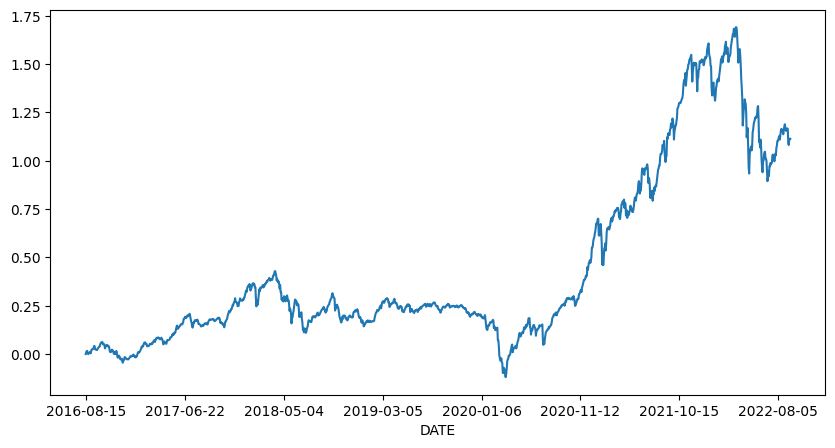

In [13]:
(portfolio_pnl(position, close)/float(cash(position, close))).plot(figsize = (10,5))

<AxesSubplot:xlabel='DATE'>

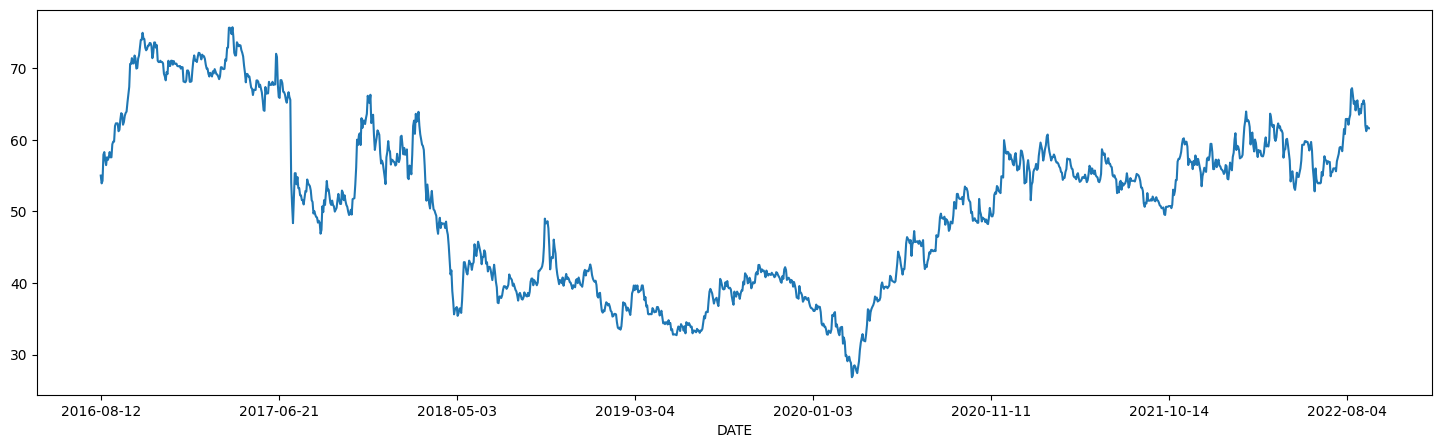

In [14]:
df_list[8].set_index('DATE').CLOSE.plot(figsize=(18,5))